# ***Project Name :***
**Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce**

##### **Project Type**    - EDA/Clustering/Recommendation
##### **Contribution**    - Vadla Shiva Kumar

# ***Project Summary***

The rapid growth of e-commerce has resulted in massive amounts of transaction data being generated daily. Analyzing this data helps businesses understand customer behavior, identify high-value segments, improve customer retention, and provide personalized product recommendations.

This project focuses on two major components:

1. Customer Segmentation using RFM (Recency, Frequency, Monetary) analysis combined with clustering.

2. Product Recommendation System using item-based collaborative filtering.

The goal is to transform raw transaction data into actionable insights and build an interactive Streamlit web application that delivers real-time predictions and recommendations.

# ***GitHub Link***

https://github.com/shivavadla931/Shopper-Spectrum.git

# ***Problem Statement***

The global e-commerce industry generates an enormous volume of transaction data every day, providing valuable insights into customer purchasing patterns and behaviors. Analyzing this data is essential for identifying meaningful customer segments, improving marketing strategies, and enhancing overall customer experience.

However, traditional analysis methods are insufficient for understanding diverse customer behaviors at scale. Businesses need automated techniques that can segment customers effectively and recommend relevant products based on their purchasing history.

This project aims to analyze online retail transaction data to:

- Identify purchasing patterns and trends
- Segment customers using Recency, Frequency, and Monetary (RFM) analysis
- Apply clustering techniques to classify customers into meaningful groups
- Develop a collaborative filtering–based product recommendation system
- Provide actionable insights that support targeted marketing and business decision-making

By combining RFM modeling with collaborative filtering, the project delivers a dual-purpose system that enhances customer understanding and enables personalized product recommendations, ultimately driving customer satisfaction and business growth.

# ***Let's Begin!***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv("https://drive.google.com/uc?id=1xVV5c_X4ZGZd3QEXQt-u_5JPwzmfizT6")

# Display first few rows of the dataset
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [3]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [4]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [5]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [6]:
# Missing and Null values count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## ***2. Understanding Your Variables***

In [7]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

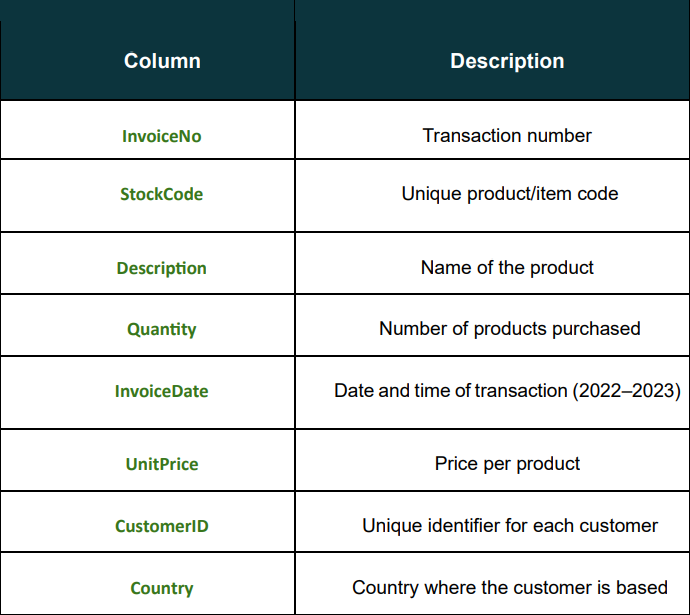

### Check Unique Values for each variable.

In [9]:
# Check Unique Values for each variable.
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## ***3. Data Preprocessing***

In [10]:
# Making a copy of the original dataframe for safety
df_clean = df.copy()

# Removing rows with missing CustomerID
df_clean = df_clean.dropna(subset=['CustomerID'])

# Exclude cancelled invoices (InvoiceNo starting with 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

# Removing negative or zero quantities and prices
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# Reset index after cleaning
df_clean.reset_index(drop=True, inplace=True)

df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
# Checking the cleaned data
df_clean.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Analyze transaction volume by country**

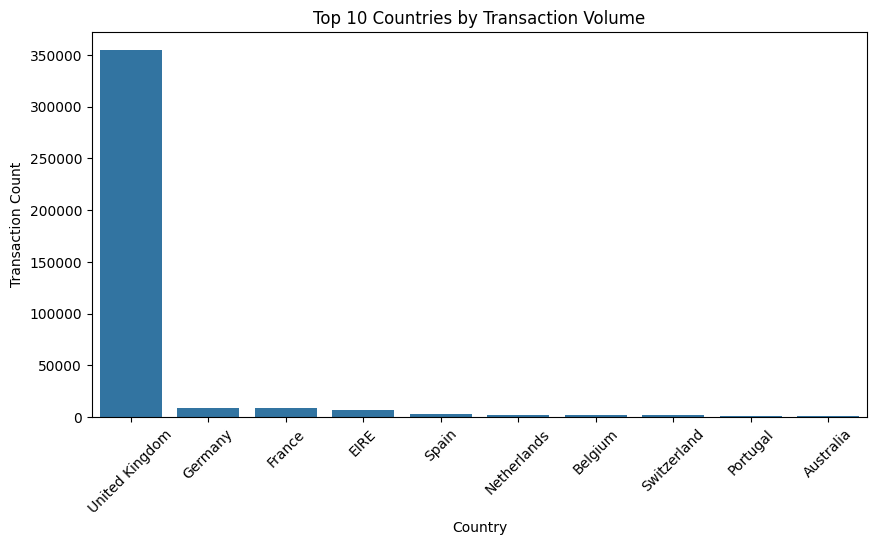

In [12]:
country_counts = df_clean['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Top 10 Countries by Transaction Volume")
plt.xlabel("Country")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.show()

#### **Useful Insights**

- The United Kingdom has the highest number of transactions, indicating that the business is primarily UK-centric.
- Countries outside Europe contribute significantly less, showing limited international reach or lower customer penetration.

### **Identify top-selling products**

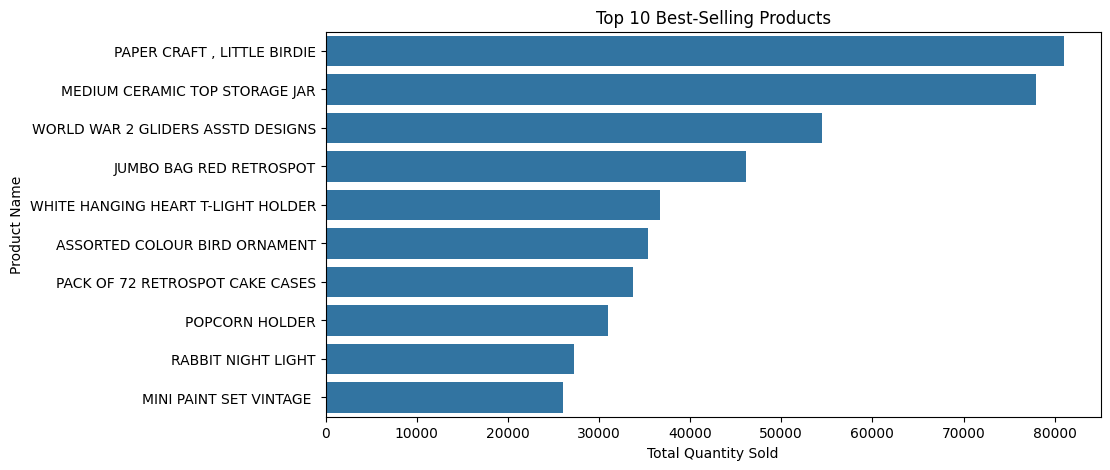

In [13]:
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()


#### **Useful Insights**

- A few products dominate sales, indicating that demand is concentrated in specific fast-moving items.
- Many products have low sales volume, suggesting a long-tail distribution and possible inventory inefficiencies.

### **Visualizing purchase trends over time**

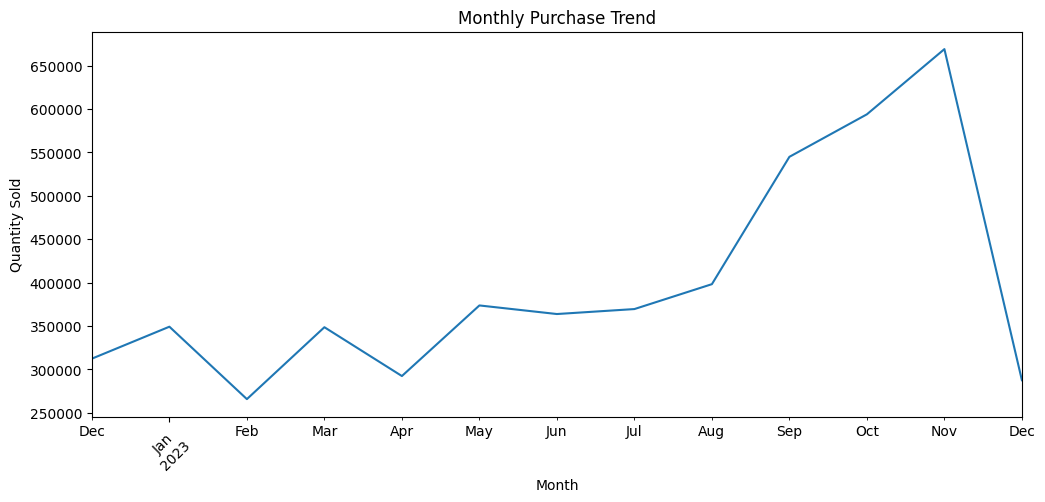

In [14]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M')

monthly_sales = df_clean.groupby('Month')['Quantity'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Purchase Trend")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

#### **Useful Insights**

- Monthly sales show seasonal variations, with noticeable peaks during holiday/festive months.
- A gradual decline/increase pattern (based on your chart) can reveal business growth rate or potential demand slowdown.

### **Monetary distribution per transaction**

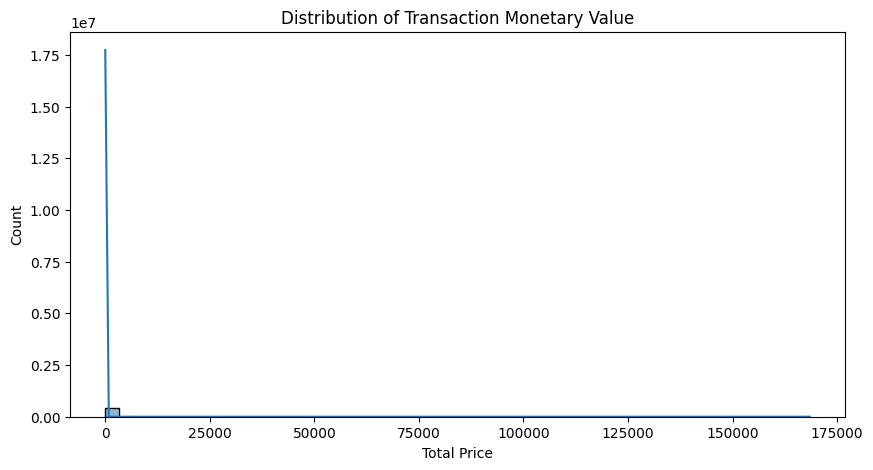

In [15]:
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

plt.figure(figsize=(10,5))
sns.histplot(df_clean['TotalPrice'], bins=50, kde=True)
plt.title("Distribution of Transaction Monetary Value")
plt.xlabel("Total Price")
plt.ylabel("Count")
plt.show()

#### **Useful Insights**

- Most transactions fall within a small monetary range, meaning customers frequently purchase low-cost items.
- A few high-value transactions appear as outliers, showing the presence of premium or bulk-buying customers.

### Calculating RFM Values for RFM Distributions

In [16]:
import datetime as dt

# Most recent date in dataset
latest_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate RFM
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                   # Frequency
    'TotalPrice': 'sum'                                     # Monetary
})

rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


### **Visualizing RFM Distributions**

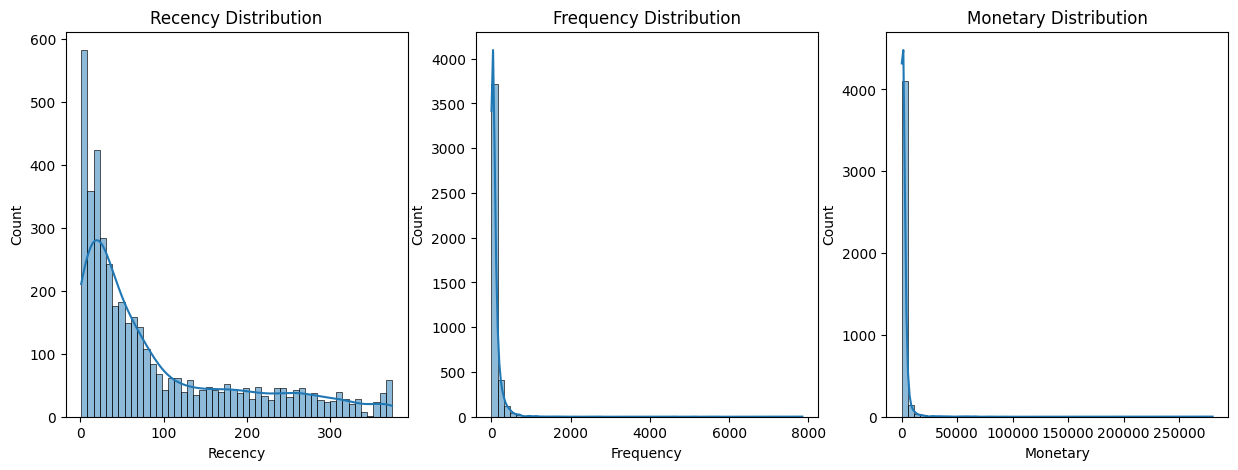

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=50, kde=True)
plt.title("Recency Distribution")

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=50, kde=True)
plt.title("Frequency Distribution")

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=50, kde=True)
plt.title("Monetary Distribution")

plt.show()

#### **Useful Insights**

**Recency**

- Most customers haven't purchased recently, indicating high churn risk.
- Only a small portion of customers are recent buyers, representing engagement opportunities.

**Frequency**

- Many customers made only one or two purchases, showing low repeat purchase behavior.
- A small group of highly frequent buyers contributes disproportionately to revenue.

**Monetary**

- Monetary value is heavily skewed, with most customers spending low amounts.
- High spenders are rare but extremely valuable for revenue.

### **Elbow Curve for KMeans Cluster Selection**

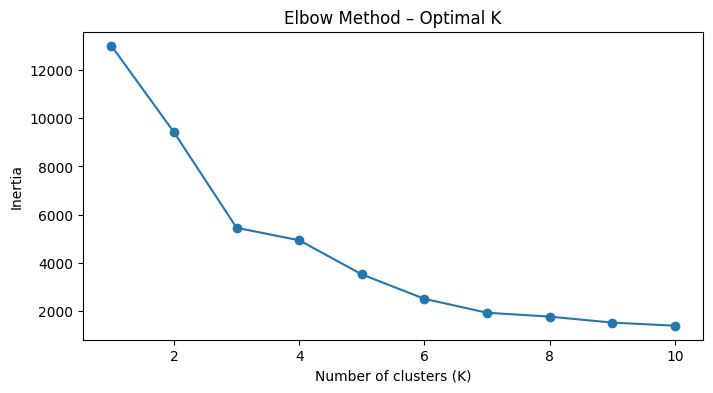

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

inertia = []
K = range(1,11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method – Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()

#### **Useful Insights**

- The elbow typically appears around K=3 or K=4, indicating an optimal number of customer segments.
- Increasing the number of clusters beyond this point results in minimal reduction of inertia, meaning little added value

### Building KMeans and Create Customer Cluster Profiles

In [19]:
# Choose optimal K based on elbow curve (example: 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Cluster profiles
rfm.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,20.990788,135.285122,2645.818172
1,98.218703,37.719457,773.877083
2,4.692308,2565.307692,126118.310000
3,272.407005,25.138889,605.842525


### **3D Cluster Visualization (Recency, Frequency, Monetary)**

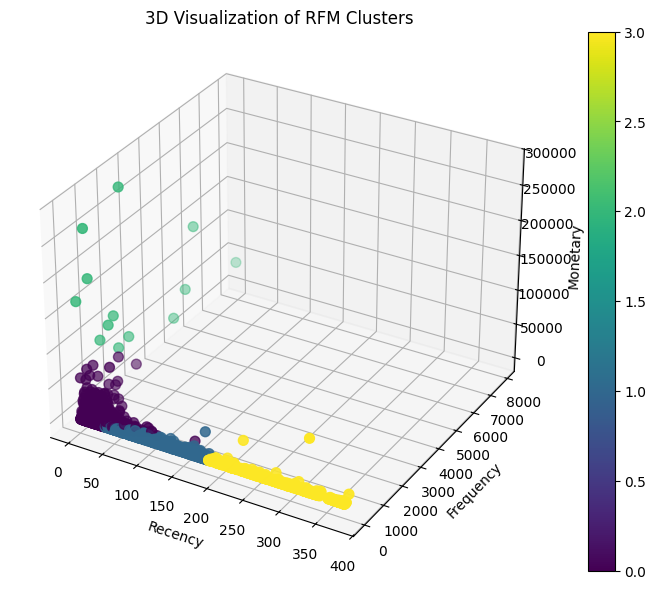

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=rfm['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Visualization of RFM Clusters')

plt.colorbar(sc)
plt.show()

#### **Useful Insights**

- The 3D plot shows clear separation between high-value, regular, and occasional customers based on combined RFM behavior, proving that KMeans effectively differentiated customer groups.
- Clusters with high Recency and low Monetary + Frequency stand out separately, indicating a segment of customers who are likely churned and may need targeted re-engagement strategies.

### **Product Recommendation Heatmap / Similarity Matrix**

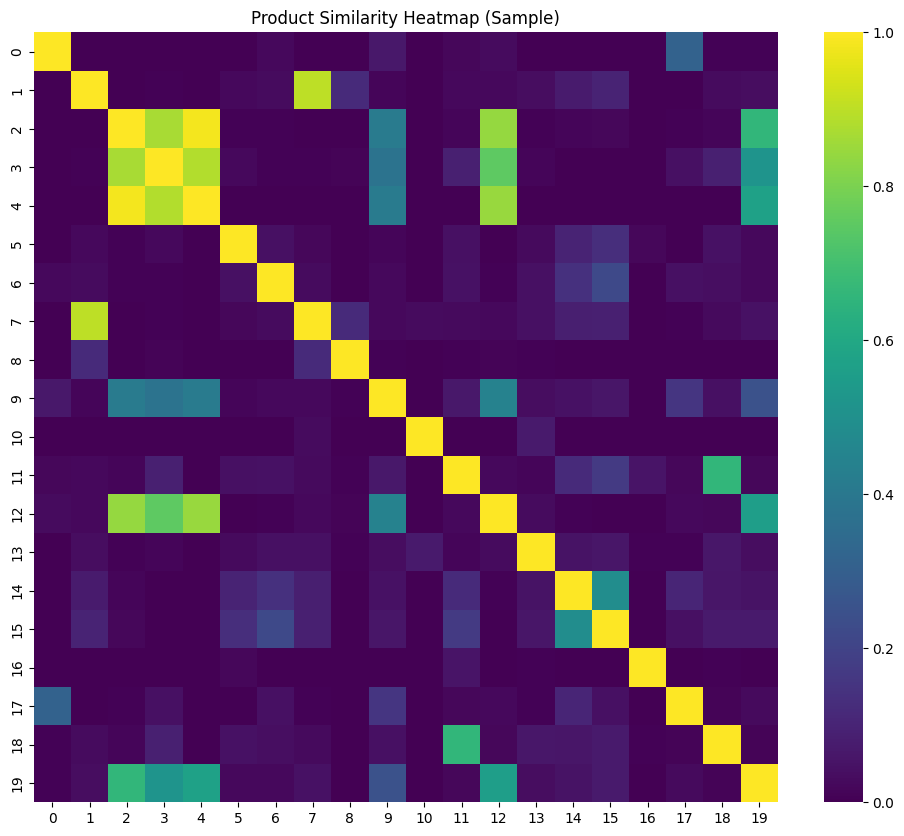

In [21]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

pivot_table = df_clean.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

similarity_matrix = cosine_similarity(pivot_table.T)

plt.figure(figsize=(12,10))
sns.heatmap(similarity_matrix[:20, :20], cmap='viridis')  # show first 20 products
plt.title("Product Similarity Heatmap (Sample)")
plt.show()

#### **Useful Insights**

- Products within the same category often show high similarity scores—customers tend to buy related items together.
- Similarity clusters help identify groups of products that can be bundled or cross-promoted to increase basket value.

## ***5. MODEL DEVELOPMENT: Clustering Methodology***

### **Feature Engineering (RFM Calculation)**

In [22]:
import datetime as dt

# Latest purchase date
latest_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate RFM values
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalPrice': 'sum'                                     # Monetary
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


### **Standardizing / Normalizing the RFM Values**

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

### **Using Elbow Method to Select K**

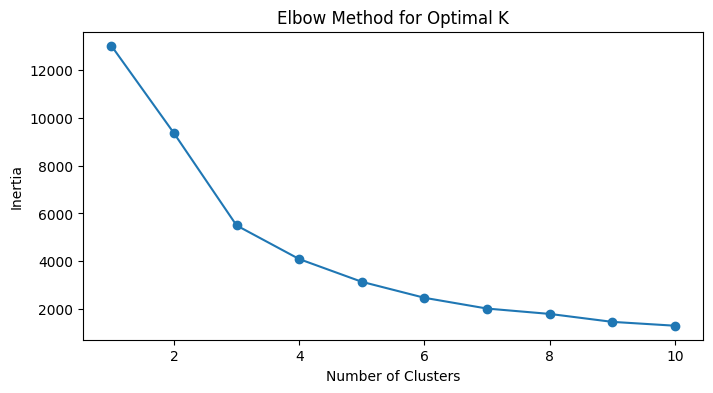

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


### **Silhouette Score to Confirm K**

In [25]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in range(2, 8):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    silhouette_scores[k] = silhouette_score(rfm_scaled, model.labels_)

silhouette_scores

{2: 0.5603671809121974,
 3: 0.5852924318247733,
 4: 0.616212846765192,
 5: 0.617115186725246,
 6: 0.5982715957283189,
 7: 0.51717221452567}

### **Running KMeans Clustering**

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

### **Labelling Clusters Based on RFM Averages**

In [27]:
cluster_means = rfm.groupby('Cluster').mean()
cluster_means

,Recency,Frequency,Monetary
Cluster,,,
0,43.702685,3.682711,1359.049284
1,248.075914,1.552015,480.617480
2,7.384615,82.538462,127338.313846
3,15.500000,22.333333,12709.090490


In [28]:
def label_cluster(row):
    r, f, m = row['Recency'], row['Frequency'], row['Monetary']
    
    if (r < rfm['Recency'].median()) and (f > rfm['Frequency'].median()) and (m > rfm['Monetary'].median()):
        return "High-Value"
    elif (f > rfm['Frequency'].median()):
        return "Regular"
    elif (r > rfm['Recency'].median() and m < rfm['Monetary'].median()):
        return "Occasional"
    else:
        return "At-Risk"

rfm['Segment'] = rfm.apply(label_cluster, axis=1)
rfm['Segment'].value_counts()

Segment
Occasional    1300
High-Value    1295
At-Risk       1028
Regular        715
Name: count, dtype: int64

### **Visualizing the Clusters**

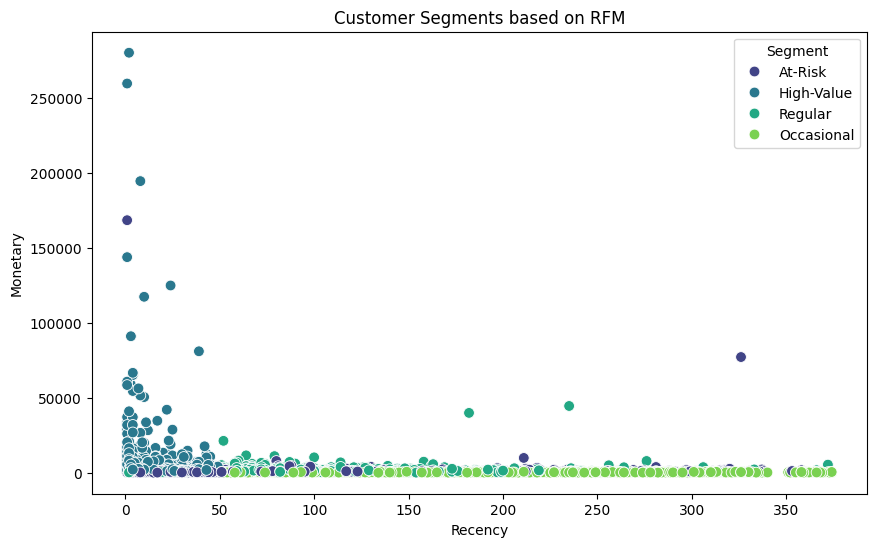

In [29]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Monetary',
    hue='Segment',
    palette='viridis',
    s=60
)
plt.title("Customer Segments based on RFM")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

### **Saving Models for Streamlit**

In [30]:
import joblib

joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(kmeans, "models/kmeans_model.pkl")

['models/kmeans_model.pkl']

## ***6. RECOMMENDATION SYSTEM***

### **Creating stomer–Product Matrix**

In [31]:
pivot_table = df_clean.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

pivot_table.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Computing Cosine Similarity Between Products**

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

product_similarity = cosine_similarity(pivot_table.T)

# Convert to dataframe for easier lookup
similarity_df = pd.DataFrame(
    product_similarity,
    index=pivot_table.columns,
    columns=pivot_table.columns
)

### **Function to Recommend Top 5 Similar Products**

In [33]:
def recommend_products(product_name, similarity_matrix, top_n=5):
    if product_name not in similarity_matrix.index:
        return "Product not found in database."

    # Sort similar products in descending order
    similar_items = similarity_matrix[product_name].sort_values(ascending=False)

    # Skip the first item because it is the product itself (similarity = 1)
    top_recommendations = similar_items.iloc[1:top_n+1].index.tolist()
    
    return top_recommendations

### **Testing the Recommendation Function**

In [34]:
recommend_products("GREEN VINTAGE SPOT BEAKER", similarity_df)

['BLUE VINTAGE SPOT BEAKER',
 'PINK VINTAGE SPOT BEAKER',
 'POTTING SHED CANDLE CITRONELLA',
 'POTTING SHED ROSE CANDLE',
 'PANTRY CHOPPING BOARD']

# ***Webservices Link***

https://shopperspectrumweb.streamlit.app/

# ***Conclusion***

- Implemented an end-to-end E-Commerce Analytics System.

- Performed customer segmentation using RFM analysis and K-Means clustering.

- Identified customer groups such as high-value, regular, occasional, and at-risk customers.

- Built a product recommendation system using cosine similarity.

- Integrated both models into an interactive Streamlit dashboard.

- Demonstrated how machine learning improves personalization and business decision-making.